# Logistic Regression


In [41]:
import numpy as np

class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """Apply the sigmoid function."""
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Train the logistic regression model."""
        # Initialize parameters
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            # Calculate linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function
            y_predicted = self.sigmoid(linear_model)

            # Compute the gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """Make predictions using the trained model."""
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)


# Bagging with LR

In [42]:
from sklearn.utils import resample

# Function to perform bagging
def bagging_with_logistic_regression(X, y, num_models=9):
    models = []
    predictions = []

    # Create multiple bootstrap samples and train a logistic regression model on each
    for i in range(num_models):
        # Create bootstrap sample
        X_resampled, y_resampled = resample(X, y, replace=True, random_state=i)
        
        # Initialize custom logistic regression model
        model = CustomLogisticRegression(learning_rate=0.01, num_iterations=1000)
        model.fit(X_resampled, y_resampled)
        models.append(model)

        # Predict on the test set
        y_pred = model.predict(X_test)
        predictions.append(y_pred)

    # Combine predictions by majority voting
    final_predictions = np.round(np.mean(predictions, axis=0)).astype(int)
    return final_predictions

# Analysis metrics

In [43]:
from sklearn.metrics import (
    confusion_matrix, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    precision_recall_curve, 
    auc,
    accuracy_score
)

# Function to calculate evaluation metrics and return them in a structured format
def evaluate_model(model_name, y_true, y_pred, y_pred_proba):
    # Compute confusion matrix to get TN, FP, FN, TP
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Sensitivity (Recall)
    sensitivity = recall_score(y_true, y_pred)

    # Specificity
    specificity = tn / (tn + fp)

    # Precision
    precision = precision_score(y_true, y_pred)

    # F1 Score
    f1 = f1_score(y_true, y_pred)

    # Area Under ROC Curve (AUROC)
    auroc = roc_auc_score(y_true, y_pred_proba)

    # Area Under Precision-Recall Curve (AUPR)
    precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_proba)
    aupr = auc(recall_vals, precision_vals)

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Return all metrics as a dictionary
    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Precision": precision,
        "F1 Score": f1,
        "AUROC": auroc,
        "AUPR": aupr
    }

# Function to print the results in a tabular format
def print_results(results):
    # Create the table header
    headers = ["Model", "Accuracy", "Sensitivity", "Specificity", "Precision", "F1 Score", "AUROC", "AUPR"]
    
    # Print the header
    print("{:<20} {:<10} {:<12} {:<12} {:<10} {:<10} {:<10} {:<10}".format(*headers))
    print("-" * 105)

    # Print each model's results
    for result in results:
        print("{:<20} {:<10.2f} {:<12.2f} {:<12.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}".format(
            result["Model"], result["Accuracy"], result["Sensitivity"], result["Specificity"],
            result["Precision"], result["F1 Score"], result["AUROC"], result["AUPR"]
        ))

    # return the 7 results
    


# ONLINE

Model                Accuracy   Sensitivity  Specificity  Precision  F1 Score   AUROC      AUPR      
---------------------------------------------------------------------------------------------------------
Logistic Regression  0.56       0.91         0.27         0.51       0.65       0.46       0.39      
Voting Ensemble      0.43       0.57         0.31         0.41       0.47       0.44       0.59      
Stacking Ensemble    0.98       0.99         0.98         0.98       0.98       0.98       0.94      


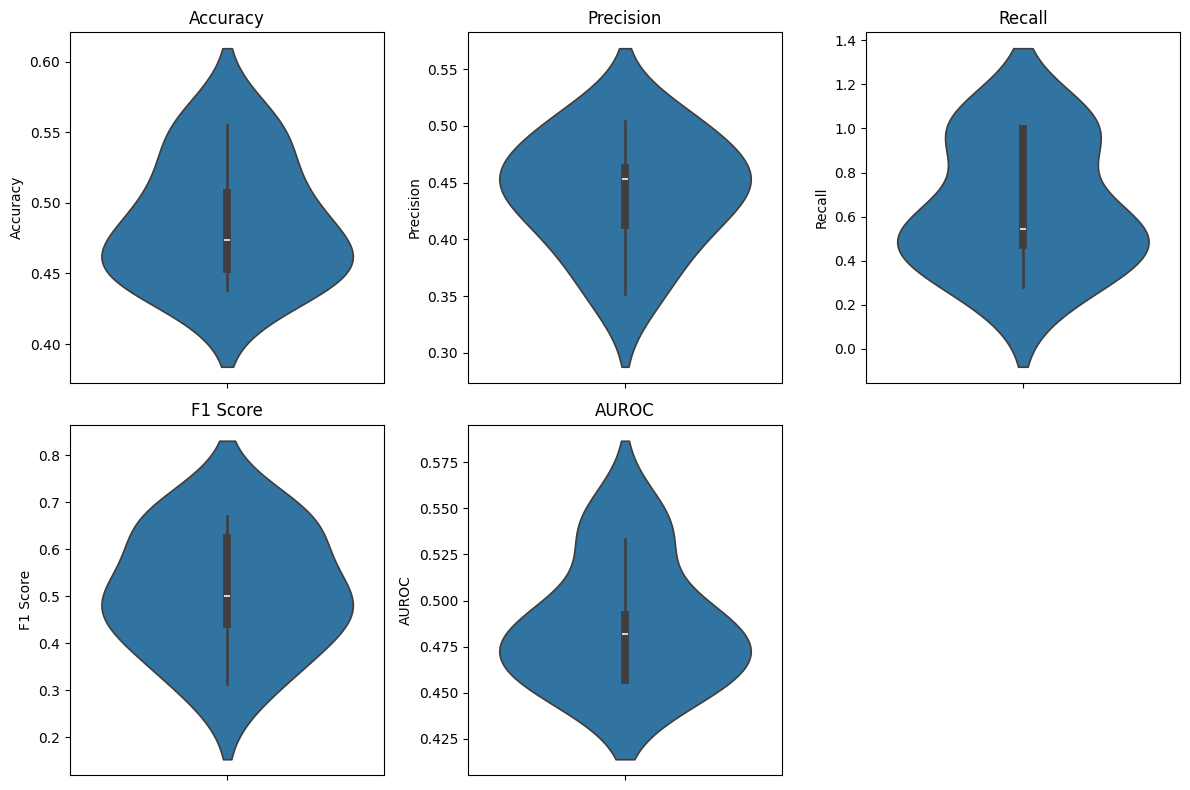

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the CSV file name
csv_name = "B1.csv"

# Load the dataset
dataframe = pd.read_csv(csv_name)

# # Drop high cardinality columns
# dataframe = dataframe.drop(columns=["customerID"])

# # Convert TotalCharges to numeric, handling errors by coercing to NaN
# dataframe["TotalCharges"] = pd.to_numeric(dataframe["TotalCharges"], errors="coerce")

# # Fill missing values in TotalCharges with the mean
# dataframe["TotalCharges"].fillna(dataframe["TotalCharges"].mean(), inplace=True)

# # Apply one-hot encoding to the entire dataframe including features and target, using drop_first to avoid multicollinearity
# dataframe_encoded = pd.get_dummies(dataframe, drop_first=True)

# features will be X1, X2 and target is y col

features = dataframe.drop(columns=["y"])
target = dataframe["y"]

# Function to scale data based on the parameter 'standardize'
standardize = True
def scale(dataframe, standardize):
    if standardize:
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(dataframe), columns=dataframe.columns)

# Scale only the features
features = scale(features, standardize)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

############### SINGLE LOGISTIC REGRESSION USING SKLEARN ################

# Initialize and train the built-in Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Predict probabilities using sklearn's clf for ROC AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate the classifier's performance
# print("\nEvaluation Metrics for Sklearn Logistic Regression Classifier:")
# metrics_sklearn = evaluate_model(y_test, y_pred, y_pred_proba)

############### BAGGING WITH CUSTOM LOGISTIC REGRESSION ################

# Run bagging using the custom logistic regression
y_pred_bagging = bagging_with_logistic_regression(X_train, y_train)

# Compute probability for the positive class (adjust this logic based on bagging implementation)
y_pred_bagging_proba = y_pred_bagging / np.max(y_pred_bagging)  

# Evaluate the custom bagged logistic regression model
# print("\nEvaluation Metrics for Bagged Custom Logistic Regression Classifier:")
# metrics_bagging = evaluate_model(y_test, y_pred_bagging, y_pred_bagging_proba)

############### STACKING ENSEMBLE ################

# Define base learners for the stacking ensemble
base_learners = [
    ('logistic', LogisticRegression()),  # Logistic Regression as a base model
    ('tree', DecisionTreeClassifier())   # Decision Tree as another base model
]

# Define the meta-model (often a stronger model like logistic regression or a different one)
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_clf = StackingClassifier(
    estimators=base_learners,  # Base models
    final_estimator=meta_model,  # Meta-model
    cv=5  # 5-fold cross-validation during training of base models
)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Make predictions using the stacking ensemble
y_pred_stacking = stacking_clf.predict(X_test)

# Predict probabilities for AUROC and AUPR
y_pred_stacking_proba = stacking_clf.predict_proba(X_test)[:, 1]

# Evaluate the stacking ensemble
# print("\nEvaluation Metrics for Stacking Ensemble Classifier:")
# metrics_stacking = evaluate_model(y_test, y_pred_stacking, y_pred_stacking_proba)



# Collect results for each model
results = []
results.append(evaluate_model("Logistic Regression", y_test, y_pred, y_pred_proba))
results.append(evaluate_model("Voting Ensemble", y_test, y_pred_bagging, y_pred_bagging_proba))
results.append(evaluate_model("Stacking Ensemble", y_test, y_pred_stacking, y_pred_stacking_proba))

# Print the results in a table format
print_results(results)


################# PLOTTING ######################

import seaborn as sns
import matplotlib.pyplot as plt

# List to store performance metrics for each bagging model
accuracies = []
precisions = []
recalls = []
f1_scores = []
aurocs = []

# Run bagging with 9 learners and collect metrics for each
for i in range(9):
    # Create bootstrap sample with the same seed for reproducibility
    X_resampled, y_resampled = resample(X_train, y_train, replace=True, random_state=i)

    # Train the custom logistic regression model on each resample
    model = CustomLogisticRegression(learning_rate=0.01, num_iterations=1000)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    y_pred_proba = model.sigmoid(np.dot(X_test, model.weights) + model.bias)

    # # Collect performance metrics
    # accuracy, sensitivity, specificity, precision, f1, auroc, aupr = evaluate_model("Logistic Regression", y_test, y_pred, y_pred_proba)

    # Collect the dictionary returned from evaluate_model
    results_lr = evaluate_model("Logistic Regression", y_test, y_pred, y_pred_proba)

    accuracy = results_lr['Accuracy']
    sensitivity = results_lr['Sensitivity']
    specificity = results_lr['Specificity']
    precision = results_lr['Precision']
    f1 = results_lr['F1 Score']
    auroc = results_lr['AUROC']
    aupr = results_lr['AUPR']

    results.append(results_lr)

    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(sensitivity)  # Sensitivity is recall
    f1_scores.append(f1)
    aurocs.append(auroc)

# Combine metrics into a dataframe for easy plotting
metrics_df = pd.DataFrame({
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'AUROC': aurocs
})

# Create violin plots for each metric
plt.figure(figsize=(12, 8))

# Violin plot for Accuracy
plt.subplot(2, 3, 1)
sns.violinplot(data=metrics_df['Accuracy'])
plt.title('Accuracy')


# Violin plot for Precision
plt.subplot(2, 3, 2)
sns.violinplot(data=metrics_df['Precision'])
plt.title('Precision')

# Violin plot for Recall
plt.subplot(2, 3, 3)
sns.violinplot(data=metrics_df['Recall'])
plt.title('Recall')

# Violin plot for F1 Score
plt.subplot(2, 3, 4)
sns.violinplot(data=metrics_df['F1 Score'])
plt.title('F1 Score')

# Violin plot for AUROC
plt.subplot(2, 3, 5)
sns.violinplot(data=metrics_df['AUROC'])
plt.title('AUROC')

plt.tight_layout()
plt.show()


# Preprocessing the stuff first DS1

C:\Users\tonmoy\AppData\Local\Temp\ipykernel_12636\2616413685.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe["TotalCharges"].fillna(dataframe["TotalCharges"].mean(), inplace=True)


Model                Accuracy   Sensitivity  Specificity  Precision  F1 Score   AUROC      AUPR      
---------------------------------------------------------------------------------------------------------
Logistic Regression  0.82       0.60         0.90         0.69       0.64       0.86       0.68      
Voting Ensemble      0.81       0.62         0.88         0.65       0.63       0.75       0.68      
Stacking Ensemble    0.82       0.57         0.92         0.71       0.63       0.86       0.68      


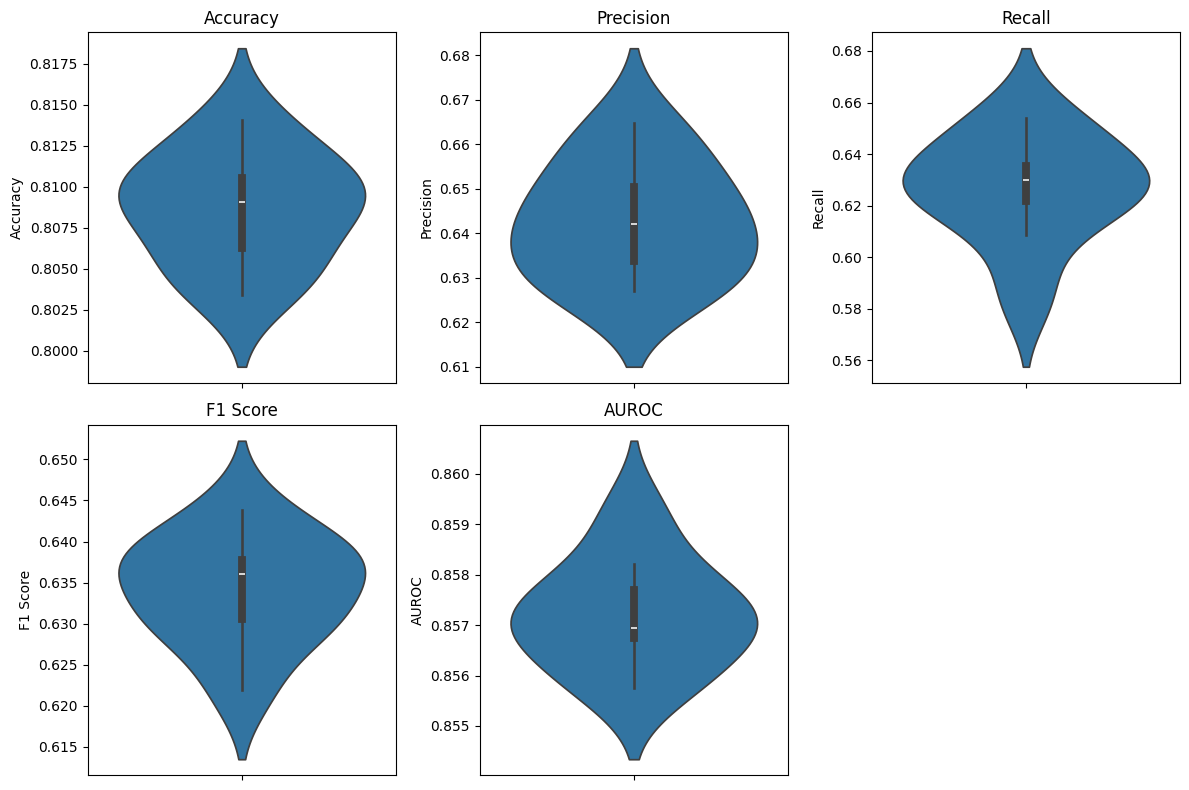

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the CSV file name
csv_name = "csv1.csv"

# Load the dataset
dataframe = pd.read_csv(csv_name)

# Drop high cardinality columns
dataframe = dataframe.drop(columns=["customerID"])

# Convert TotalCharges to numeric, handling errors by coercing to NaN
dataframe["TotalCharges"] = pd.to_numeric(dataframe["TotalCharges"], errors="coerce")

# Fill missing values in TotalCharges with the mean
dataframe["TotalCharges"].fillna(dataframe["TotalCharges"].mean(), inplace=True)

# Apply one-hot encoding to the entire dataframe including features and target, using drop_first to avoid multicollinearity
dataframe_encoded = pd.get_dummies(dataframe, drop_first=True)

# Define features and target
features = dataframe_encoded.drop(columns=["Churn_Yes"])
target = dataframe_encoded["Churn_Yes"]

# Function to scale data based on the parameter 'standardize'
standardize = True
def scale(dataframe, standardize):
    if standardize:
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(dataframe), columns=dataframe.columns)

# Scale only the features
features = scale(features, standardize)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

############### SINGLE LOGISTIC REGRESSION USING SKLEARN ################

# Initialize and train the built-in Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Predict probabilities using sklearn's clf for ROC AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate the classifier's performance
# print("\nEvaluation Metrics for Sklearn Logistic Regression Classifier:")
# metrics_sklearn = evaluate_model(y_test, y_pred, y_pred_proba)

############### BAGGING WITH CUSTOM LOGISTIC REGRESSION ################

# Run bagging using the custom logistic regression
y_pred_bagging = bagging_with_logistic_regression(X_train, y_train)

# Compute probability for the positive class (adjust this logic based on bagging implementation)
y_pred_bagging_proba = y_pred_bagging / np.max(y_pred_bagging)  

# Evaluate the custom bagged logistic regression model
# print("\nEvaluation Metrics for Bagged Custom Logistic Regression Classifier:")
# metrics_bagging = evaluate_model(y_test, y_pred_bagging, y_pred_bagging_proba)

############### STACKING ENSEMBLE ################

# Define base learners for the stacking ensemble
base_learners = [
    ('logistic', LogisticRegression()),  # Logistic Regression as a base model
    ('tree', DecisionTreeClassifier())   # Decision Tree as another base model
]

# Define the meta-model (often a stronger model like logistic regression or a different one)
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_clf = StackingClassifier(
    estimators=base_learners,  # Base models
    final_estimator=meta_model,  # Meta-model
    cv=5  # 5-fold cross-validation during training of base models
)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Make predictions using the stacking ensemble
y_pred_stacking = stacking_clf.predict(X_test)

# Predict probabilities for AUROC and AUPR
y_pred_stacking_proba = stacking_clf.predict_proba(X_test)[:, 1]

# Evaluate the stacking ensemble
# print("\nEvaluation Metrics for Stacking Ensemble Classifier:")
# metrics_stacking = evaluate_model(y_test, y_pred_stacking, y_pred_stacking_proba)


# Collect results for each model
results = []
results.append(evaluate_model("Logistic Regression", y_test, y_pred, y_pred_proba))
results.append(evaluate_model("Voting Ensemble", y_test, y_pred_bagging, y_pred_bagging_proba))
results.append(evaluate_model("Stacking Ensemble", y_test, y_pred_stacking, y_pred_stacking_proba))

# Print the results in a table format
print_results(results)


################# PLOTTING ######################

import seaborn as sns
import matplotlib.pyplot as plt

# List to store performance metrics for each bagging model
accuracies = []
precisions = []
recalls = []
f1_scores = []
aurocs = []

# Run bagging with 9 learners and collect metrics for each
for i in range(9):
    # Create bootstrap sample with the same seed for reproducibility
    X_resampled, y_resampled = resample(X_train, y_train, replace=True, random_state=i)

    # Train the custom logistic regression model on each resample
    model = CustomLogisticRegression(learning_rate=0.01, num_iterations=1000)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    y_pred_proba = model.sigmoid(np.dot(X_test, model.weights) + model.bias)

    # # Collect performance metrics
    # accuracy, sensitivity, specificity, precision, f1, auroc, aupr = evaluate_model("Logistic Regression", y_test, y_pred, y_pred_proba)

    # Collect the dictionary returned from evaluate_model
    results_lr = evaluate_model("Logistic Regression", y_test, y_pred, y_pred_proba)

    accuracy = results_lr['Accuracy']
    sensitivity = results_lr['Sensitivity']
    specificity = results_lr['Specificity']
    precision = results_lr['Precision']
    f1 = results_lr['F1 Score']
    auroc = results_lr['AUROC']
    aupr = results_lr['AUPR']

    results.append(results_lr)

    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(sensitivity)  # Sensitivity is recall
    f1_scores.append(f1)
    aurocs.append(auroc)

# Combine metrics into a dataframe for easy plotting
metrics_df = pd.DataFrame({
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'AUROC': aurocs
})

# Create violin plots for each metric
plt.figure(figsize=(12, 8))

# Violin plot for Accuracy
plt.subplot(2, 3, 1)
sns.violinplot(data=metrics_df['Accuracy'])
plt.title('Accuracy')

# Violin plot for Precision
plt.subplot(2, 3, 2)
sns.violinplot(data=metrics_df['Precision'])
plt.title('Precision')

# Violin plot for Recall
plt.subplot(2, 3, 3)
sns.violinplot(data=metrics_df['Recall'])
plt.title('Recall')

# Violin plot for F1 Score
plt.subplot(2, 3, 4)
sns.violinplot(data=metrics_df['F1 Score'])
plt.title('F1 Score')

# Violin plot for AUROC
plt.subplot(2, 3, 5)
sns.violinplot(data=metrics_df['AUROC'])
plt.title('AUROC')

plt.tight_layout()
plt.show()


# Preprocessing for DS2

C:\Users\tonmoy\AppData\Local\Temp\ipykernel_12636\1401558146.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[column].fillna(mode_value, inplace=True)  # Replace NaNs with mode
C:\Users\tonmoy\AppData\Local\Temp\ipykernel_12636\1401558146.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al


Evaluation Metrics for Bagged Custom Logistic Regression Classifier:
Accuracy: 0.8569452980946527
Precision: 0.7526315789473684
Recall: 0.6244541484716157
F1 Score: 0.6825775656324582
AUROC: 0.7786898673041055


c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)



Evaluation Metrics for Stacking Ensemble Classifier:
Accuracy: 0.8564843269821758
Precision: 0.7555385790679908
Recall: 0.6169681846537741
F1 Score: 0.6792582417582418
AUROC: 0.9090387989390434


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8544867854947756
Precision: 0.7462462462462462
Recall: 0.6200873362445415
F1 Score: 0.6773424190800681
AUROC: 0.9064426219187648
Accuracy: 0.8557160417947142
Precision: 0.7459259259259259
Recall: 0.6281971303805365
F1 Score: 0.682018286488317
AUROC: 0.9069283320074555


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8560233558696988
Precision: 0.7488789237668162
Recall: 0.6250779787897692
F1 Score: 0.6814008840530432
AUROC: 0.9061831695540281
Accuracy: 0.8543331284572834
Precision: 0.7490494296577946
Recall: 0.6144728633811604
F1 Score: 0.6751199451679233
AUROC: 0.904957638678243


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8552550706822373
Precision: 0.7471952131637996
Recall: 0.6232064878353087
F1 Score: 0.6795918367346939
AUROC: 0.9065960040520354
Accuracy: 0.8531038721573448
Precision: 0.736996336996337
Recall: 0.627573300062383
F1 Score: 0.6778975741239892
AUROC: 0.9037614869672882


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8557160417947142
Precision: 0.7462908011869436
Recall: 0.627573300062383
F1 Score: 0.6818027787190782
AUROC: 0.9067759673344385


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8552550706822373
Precision: 0.7449962935507783
Recall: 0.6269494697442296
F1 Score: 0.6808943089430894
AUROC: 0.9060558598397628


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8558696988322065
Precision: 0.7435897435897436
Recall: 0.6331877729257642
F1 Score: 0.6839622641509434
AUROC: 0.905348089050665


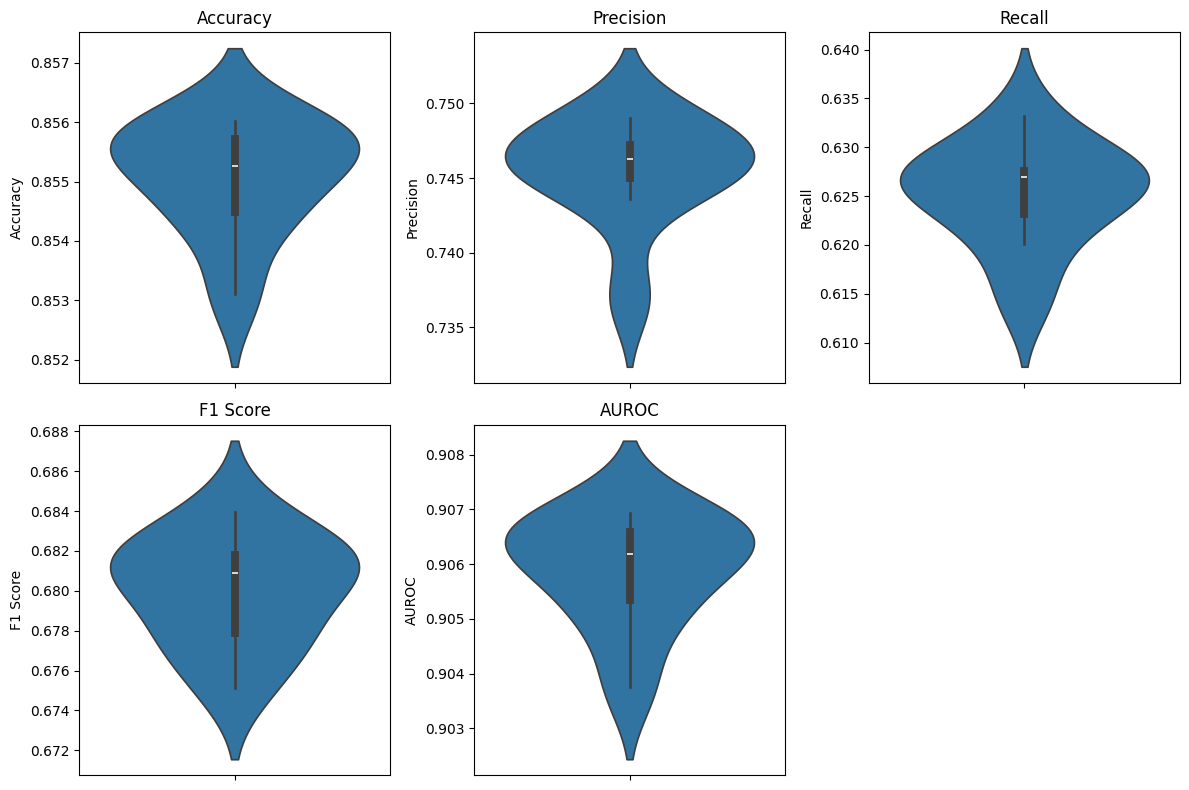

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

# Define the CSV file name
csv_name = "csv2.csv"

# Load the dataset
dataframe = pd.read_csv(csv_name)

dataframe = dataframe.drop_duplicates()

for column in dataframe.columns:
    mode_value = dataframe[column].mode()[0]  # Get the mode of the column
    dataframe[column].fillna(mode_value, inplace=True)  # Replace NaNs with mode

# Set a threshold for high cardinality (e.g., more than 50 unique values)
high_cardinality_cols = [col for col in dataframe.columns if dataframe[col].nunique() > 50]

target_column = "income"  # Target column is 'income'
features = dataframe.drop(columns=[target_column])
target = dataframe[target_column]

non_numeric_cols = features.select_dtypes(exclude=[np.number]).columns

features = pd.get_dummies(features, columns=non_numeric_cols, drop_first=True)

# apply one-hot encoding to the target column
target = pd.get_dummies(target, drop_first=True)


standardize = True  # Set to False for MinMaxScaler

def scale(dataframe, standardize):
    if standardize:
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()
    if dataframe.empty:
        raise ValueError("DataFrame is empty, cannot apply scaler.")
    return pd.DataFrame(scaler.fit_transform(dataframe), columns=dataframe.columns)

# Scale the features
features = scale(features, standardize)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

######################### SINGLE LOGISTIC REGRESSION USING SKLEARN ################

# Initialize and train the built-in Logistic Regression classifier
clf = LogisticRegression(max_iter=1000)  # Increased iterations for convergence
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Predict probabilities using sklearn's clf for ROC AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate the classifier's performance
def evaluate_model(y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    auroc = roc_auc_score(y_true, y_pred_proba)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUROC: {auroc}")
    return accuracy, precision, recall, f1, auroc



# print("\nEvaluation Metrics for Sklearn Logistic Regression Classifier:")
# metrics_sklearn = evaluate_model(y_test, y_pred, y_pred_proba)

############### BAGGING WITH CUSTOM LOGISTIC REGRESSION ################

# Custom bagging with logistic regression (simplified)
def bagging_with_logistic_regression(X_train, y_train, num_models=10):
    predictions = []
    for i in range(num_models):
        X_resampled, y_resampled = resample(X_train, y_train, random_state=i)
        model = LogisticRegression(max_iter=1000)  # Ensure convergence
        model.fit(X_resampled, y_resampled)
        predictions.append(model.predict(X_test))
    # Aggregate predictions via majority voting
    y_pred_bagging = np.mean(predictions, axis=0)
    y_pred_bagging = np.round(y_pred_bagging).astype(int)
    return y_pred_bagging

y_pred_bagging = bagging_with_logistic_regression(X_train, y_train)

# Simplified probabilities for AUROC computation
y_pred_bagging_proba = y_pred_bagging / np.max(y_pred_bagging)

print("\nEvaluation Metrics for Bagged Custom Logistic Regression Classifier:")
metrics_bagging = evaluate_model(y_test, y_pred_bagging, y_pred_bagging_proba)

############### STACKING ENSEMBLE ################

# Define base learners for the stacking ensemble
base_learners = [
    ('logistic', LogisticRegression(max_iter=1000)),  # Logistic Regression as a base model
    ('tree', DecisionTreeClassifier())   # Decision Tree as another base model
]

# Define the meta-model
meta_model = LogisticRegression(max_iter=1000)

# Create the stacking ensemble
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5  # 5-fold cross-validation during training of base models
)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Make predictions using the stacking ensemble
y_pred_stacking = stacking_clf.predict(X_test)

# Predict probabilities for AUROC
y_pred_stacking_proba = stacking_clf.predict_proba(X_test)[:, 1]

print("\nEvaluation Metrics for Stacking Ensemble Classifier:")
metrics_stacking = evaluate_model(y_test, y_pred_stacking, y_pred_stacking_proba)

################# PLOTTING ######################

# List to store performance metrics for each bagging model
accuracies = []
precisions = []
recalls = []
f1_scores = []
aurocs = []

# Run bagging with 9 learners and collect metrics for each
for i in range(9):
    X_resampled, y_resampled = resample(X_train, y_train, replace=True, random_state=i)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy, precision, recall, f1, auroc = evaluate_model(y_test, y_pred, y_pred_proba)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    aurocs.append(auroc)

# Combine metrics into a dataframe for easy plotting
metrics_df = pd.DataFrame({
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'AUROC': aurocs
})

# Create violin plots for each metric
plt.figure(figsize=(12, 8))

# Violin plot for Accuracy
plt.subplot(2, 3, 1)
sns.violinplot(data=metrics_df['Accuracy'])
plt.title('Accuracy')

# Violin plot for Precision
plt.subplot(2, 3, 2)
sns.violinplot(data=metrics_df['Precision'])
plt.title('Precision')

# Violin plot for Recall
plt.subplot(2, 3, 3)
sns.violinplot(data=metrics_df['Recall'])
plt.title('Recall')

# Violin plot for F1 Score
plt.subplot(2, 3, 4)
sns.violinplot(data=metrics_df['F1 Score'])
plt.title('F1 Score')

# Violin plot for AUROC
plt.subplot(2, 3, 5)
sns.violinplot(data=metrics_df['AUROC'])
plt.title('AUROC')

plt.tight_layout()
plt.show()


# Preprocessing for DS3

C:\Users\tonmoy\AppData\Local\Temp\ipykernel_12636\251048466.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[column].fillna(mode_value, inplace=True)  # Replace NaNs with mode
C:\Users\tonmoy\AppData\Local\Temp\ipykernel_12636\251048466.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa


Evaluation Metrics for Sklearn Logistic Regression Classifier:
Accuracy: 0.9991893701758714
Precision: 0.8928571428571429
Recall: 0.5555555555555556
F1 Score: 0.684931506849315
AUROC: 0.966223642097336

Evaluation Metrics for Bagged Custom Logistic Regression Classifier:
Accuracy: 0.9992246149508336
Precision: 0.896551724137931
Recall: 0.5777777777777777
F1 Score: 0.7027027027027027
AUROC: 0.7888359377451442

Evaluation Metrics for Stacking Ensemble Classifier:
Accuracy: 0.999365594050682
Precision: 0.9655172413793104
Recall: 0.6222222222222222
F1 Score: 0.7567567567567568
AUROC: 0.966752172958047
Accuracy: 0.9989250343636555
Precision: 0.8717948717948718
Recall: 0.37777777777777777
F1 Score: 0.5271317829457365
AUROC: 0.9681341978097837
Accuracy: 0.9989602791386177
Precision: 0.8780487804878049
Recall: 0.4
F1 Score: 0.549618320610687
AUROC: 0.9654923279676174
Accuracy: 0.9989602791386177
Precision: 0.8780487804878049
Recall: 0.4
F1 Score: 0.549618320610687
AUROC: 0.9736989707866579
Ac

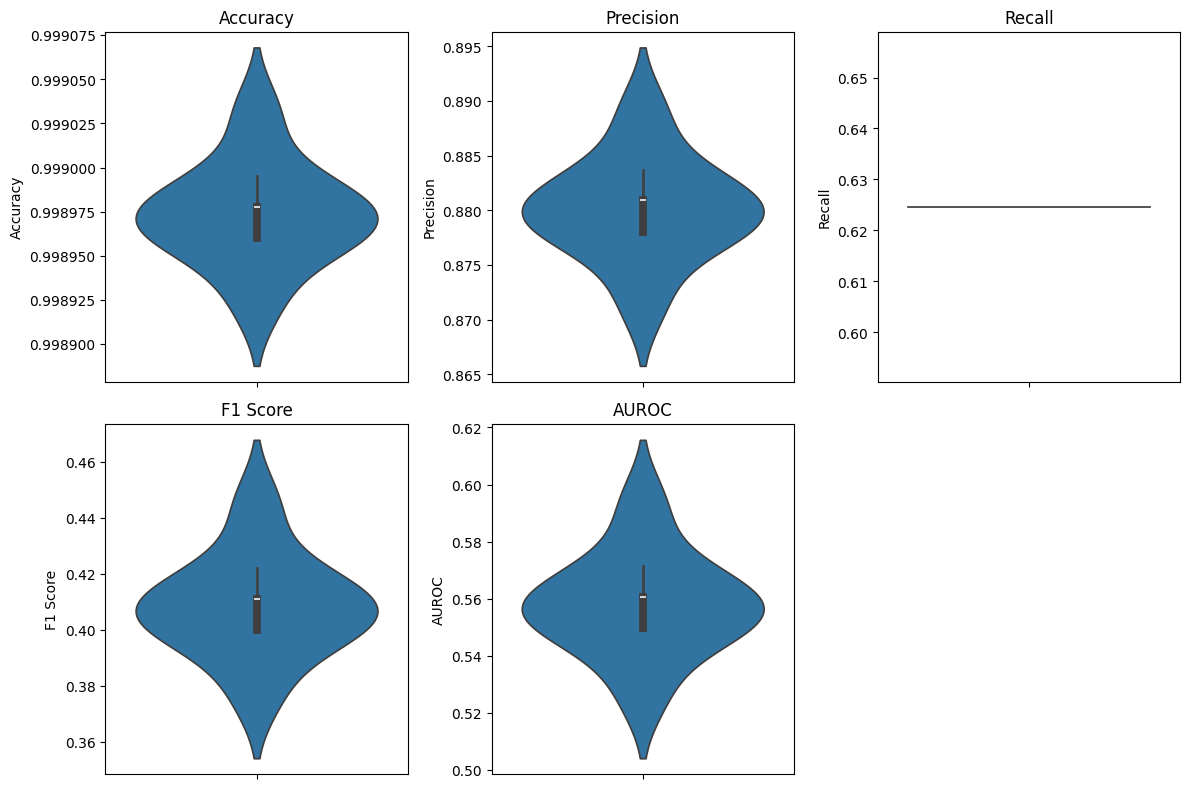

In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the CSV file name
csv_name = "csv3.csv"

# Load the dataset
dataframe = pd.read_csv(csv_name)

dataframe = dataframe.drop_duplicates()

for column in dataframe.columns:
    mode_value = dataframe[column].mode()[0]  # Get the mode of the column
    dataframe[column].fillna(mode_value, inplace=True)  # Replace NaNs with mode

# Set a threshold for high cardinality (e.g., more than 50 unique values)
high_cardinality_cols = [col for col in dataframe.columns if dataframe[col].nunique() > 50]

# Drop high cardinality columns before scaling
# dataframe = dataframe.drop(columns=high_cardinality_cols)

target_column = "Class"  # Target column is 'Class'
features = dataframe.drop(columns=[target_column])
target = dataframe[target_column]

# Ensure features is not empty and contains only numeric columns
if features.empty:
    raise ValueError("Features dataframe is empty after dropping high cardinality columns.")

# Check for any non-numeric columns
non_numeric_cols = features.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    raise ValueError(f"The following columns are non-numeric: {non_numeric_cols}")

standardize = True

def scale(dataframe, standardize):
    if standardize:
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()
    # Ensure the dataframe is not empty before scaling
    if dataframe.empty:
        raise ValueError("DataFrame is empty, cannot apply scaler.")
    return pd.DataFrame(scaler.fit_transform(dataframe), columns=dataframe.columns)

# Scale the features
features = scale(features, standardize)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

######################### ##############################

############### SINGLE LOGISTIC REGRESSION USING SKLEARN ################

# Initialize and train the built-in Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Predict probabilities using sklearn's clf for ROC AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate the classifier's performance
print("\nEvaluation Metrics for Sklearn Logistic Regression Classifier:")
metrics_sklearn = evaluate_model(y_test, y_pred, y_pred_proba)

############### BAGGING WITH CUSTOM LOGISTIC REGRESSION ################

# Run bagging using the custom logistic regression
y_pred_bagging = bagging_with_logistic_regression(X_train, y_train)

# Compute probability for the positive class (adjust this logic based on bagging implementation)
y_pred_bagging_proba = y_pred_bagging / np.max(y_pred_bagging)  

# Evaluate the custom bagged logistic regression model
print("\nEvaluation Metrics for Bagged Custom Logistic Regression Classifier:")
metrics_bagging = evaluate_model(y_test, y_pred_bagging, y_pred_bagging_proba)

############### STACKING ENSEMBLE ################

# Define base learners for the stacking ensemble
base_learners = [
    ('logistic', LogisticRegression()),  # Logistic Regression as a base model
    ('tree', DecisionTreeClassifier())   # Decision Tree as another base model
]

# Define the meta-model (often a stronger model like logistic regression or a different one)
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_clf = StackingClassifier(
    estimators=base_learners,  # Base models
    final_estimator=meta_model,  # Meta-model
    cv=5  # 5-fold cross-validation during training of base models
)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Make predictions using the stacking ensemble
y_pred_stacking = stacking_clf.predict(X_test)

# Predict probabilities for AUROC and AUPR
y_pred_stacking_proba = stacking_clf.predict_proba(X_test)[:, 1]

# Evaluate the stacking ensemble
print("\nEvaluation Metrics for Stacking Ensemble Classifier:")
metrics_stacking = evaluate_model(y_test, y_pred_stacking, y_pred_stacking_proba)

#################33 PLOTTING ######################

import seaborn as sns
import matplotlib.pyplot as plt

# List to store performance metrics for each bagging model
accuracies = []
precisions = []
recalls = []
f1_scores = []
aurocs = []

# Run bagging with 9 learners and collect metrics for each
for i in range(9):
    # Create bootstrap sample with the same seed for reproducibility
    X_resampled, y_resampled = resample(X_train, y_train, replace=True, random_state=i)

    # Train the custom logistic regression model on each resample
    model = CustomLogisticRegression(learning_rate=0.01, num_iterations=1000)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    y_pred_proba = model.sigmoid(np.dot(X_test, model.weights) + model.bias)

    # Collect performance metrics
    accuracy, precision, f1, auroc, aupr = evaluate_model(y_test, y_pred, y_pred_proba)

    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(sensitivity)  # Sensitivity is recall
    f1_scores.append(f1)
    aurocs.append(auroc)

# Combine metrics into a dataframe for easy plotting
metrics_df = pd.DataFrame({
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'AUROC': aurocs
})

# Create violin plots for each metric
plt.figure(figsize=(12, 8))

# Violin plot for Accuracy
plt.subplot(2, 3, 1)
sns.violinplot(data=metrics_df['Accuracy'])
plt.title('Accuracy')

# Violin plot for Precision
plt.subplot(2, 3, 2)
sns.violinplot(data=metrics_df['Precision'])
plt.title('Precision')

# Violin plot for Recall
plt.subplot(2, 3, 3)
sns.violinplot(data=metrics_df['Recall'])
plt.title('Recall')

# Violin plot for F1 Score
plt.subplot(2, 3, 4)
sns.violinplot(data=metrics_df['F1 Score'])
plt.title('F1 Score')

# Violin plot for AUROC
plt.subplot(2, 3, 5)
sns.violinplot(data=metrics_df['AUROC'])
plt.title('AUROC')

plt.tight_layout()
plt.show()
